In [2]:
import os, sys
import numpy as np
import torch
import torch.nn.functional as F
from torchmetrics import Accuracy
import hydra
from omegaconf import DictConfig
import wandb
from termcolor import cprint
from tqdm import tqdm

import matplotlib.pyplot as plt

from src.datasets import ThingsMEGDataset
from src.models import BasicConvClassifier
from src.utils import set_seed

In [3]:
torch.backends.mps.is_available()

True

In [4]:
# データの読み込み
data_dir = "data"
X = torch.load(os.path.join(data_dir, "train_X.pt"))
y = torch.load(os.path.join(data_dir, "train_y.pt"))
subject_idxs = torch.load(os.path.join(data_dir, "train_subject_idxs.pt"))

# データの確認
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subject_idxs shape: {subject_idxs.shape}")

X shape: torch.Size([65728, 271, 281])
y shape: torch.Size([65728])
subject_idxs shape: torch.Size([65728])


In [5]:
len(y.unique())

1854

In [7]:
y

tensor([1759,  576,  626,  ..., 1456,  967,  548])

In [9]:
# 1つの画像に対し，長さが281の脳波が271通りある？
X[0]

tensor([[ 1.5771,  0.5370,  0.1519,  ...,  0.1662, -0.3599, -1.6788],
        [ 1.9468,  1.6864,  1.3518,  ..., -1.3328, -1.5306, -2.2897],
        [ 1.2937,  1.3062,  1.1686,  ..., -1.0367, -0.8830, -1.1998],
        ...,
        [-0.3281, -0.8782, -1.1338,  ...,  0.3077,  0.2089,  0.1742],
        [-1.1487, -1.4622, -1.6628,  ...,  0.1894, -0.0746, -0.1722],
        [ 1.3936,  0.7902,  0.1187,  ...,  0.4114,  0.7303,  1.4094]])

X shape: torch.Size([65728, 271, 281])
y shape: torch.Size([65728])
subject_idxs shape: torch.Size([65728])
Unique labels: tensor([   0,    1,    2,  ..., 1851, 1852, 1853])
Counts: tensor([32, 32, 32,  ..., 32, 32, 32])
Unique subjects: tensor([0, 1, 2, 3])
Counts: tensor([16432, 16432, 16432, 16432])


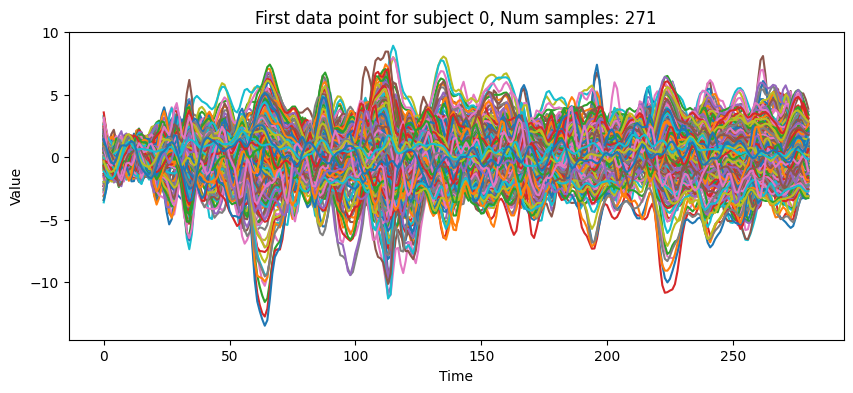

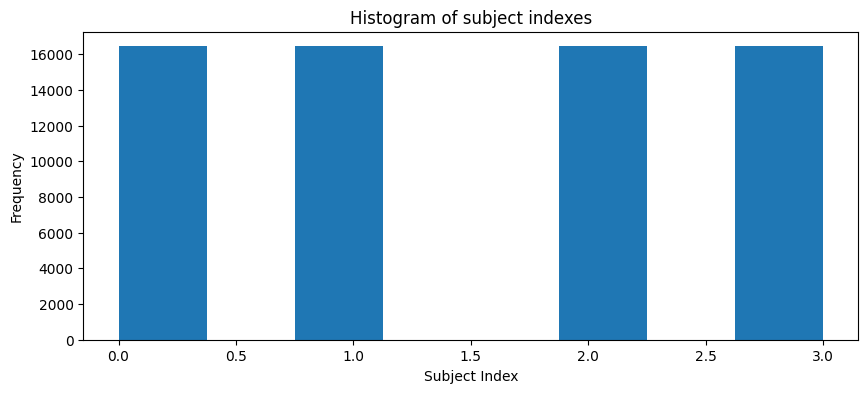

In [18]:
# データの確認
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subject_idxs shape: {subject_idxs.shape}")

# yのユニークな値とその数を確認
unique_labels, counts = torch.unique(y, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Counts: {counts}")

# subject_idxsのユニークな値とその数を確認
unique_subjects, counts = torch.unique(subject_idxs, return_counts=True)
print(f"Unique subjects: {unique_subjects}")
print(f"Counts: {counts}")

# 例として、最初の被験者のデータポイントをプロット
subject_id = unique_subjects[0].item()
subject_data = X[subject_idxs == subject_id]

plt.figure(figsize=(10, 4))
plt.plot(subject_data[0].numpy().T)  # 最初のデータポイントをプロット
plt.title(f"First data point for subject {subject_id}, Num samples: {len(subject_data[0])}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# subject_idxsのヒストグラム
plt.figure(figsize=(10, 4))
plt.hist(subject_idxs.numpy(), bins=len(unique_subjects)*2)
plt.title("Histogram of subject indexes")
plt.xlabel("Subject Index")
plt.ylabel("Frequency")
plt.show()